In [16]:
import numpy as np

from dolfin import *
import matplotlib.pyplot as plt

Plotting a UnitIntervalMesh


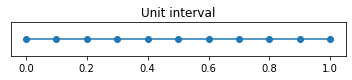

In [17]:
mesh = UnitIntervalMesh(10)
print("Plotting a UnitIntervalMesh")
plt.figure()
plot(mesh, title="Unit interval")


Plotting a UnitSquareMesh
[[0.  0. ]
 [0.5 0. ]
 [1.  0. ]
 [0.  0.5]
 [0.5 0.5]
 [1.  0.5]
 [0.  1. ]
 [0.5 1. ]
 [1.  1. ]]
[[0.  0. ]
 [0.5 0. ]
 [1.  0. ]
 [0.  0.5]
 [0.5 0.5]
 [1.  0.5]
 [0.  1. ]
 [0.5 1. ]
 [1.  1. ]]


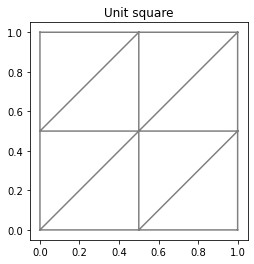

In [18]:
mesh = UnitSquareMesh(2, 2)
print("Plotting a UnitSquareMesh")
plt.figure()
plot(mesh, title="Unit square")
print (mesh.coordinates())

# salve the mesh
File('us.xml')<<mesh

##read 
M1=Mesh('us.xml')
print(M1.coordinates())


In [19]:
mesh = UnitSquareMesh(2, 2)
print(mesh.cells())
print(mesh.hmax()) #Compute maximum cell diameter.
print( mesh.hmin()) #Compute mim cell diameter

[[0 1 4]
 [0 3 4]
 [1 2 5]
 [1 4 5]
 [3 4 7]
 [3 6 7]
 [4 5 8]
 [4 7 8]]
0.7071067811865476
0.7071067811865476


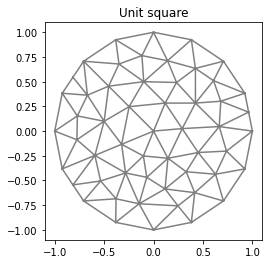

In [20]:
from mshr import *
domain = Circle(Point(0, 0), 1)
mesh = generate_mesh(domain, 5)
plot(mesh, title="Unit square")

The area of subdomain 1 is 1.250000e+00
The area of subdomain 2 is 3.750000e+00


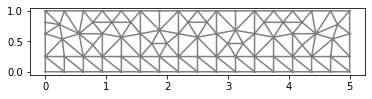

In [21]:
from dolfin import *
import mshr
import matplotlib.pyplot as plt
# Create the geometry
p0 = Point((0.,0))
p1 = Point((0,.25))
p2 = Point((5,.25))
p3 = Point((5,1))
r0 = mshr.Rectangle(p0,p2)
r1 = mshr.Rectangle(p1,p3)
geom = r0 + r1
# set subdomains
geom.set_subdomain(1,r0)
geom.set_subdomain(2,r1)
# generate mesh
mesh = mshr.generate_mesh(geom,10)
plot(mesh)
# define  the mesh function and the measure 
# including the labels 1 and 2 
domains = mesh.domains()
mf = MeshFunction('size_t',mesh,2,domains)
dx = Measure("dx",domain=mesh,subdomain_data=mf)
# Example, calculat the area of the rectangle
s1 = assemble(Constant(1)*dx(1))
s2 = assemble(Constant(1)*dx(2))
print("The area of subdomain 1 is {:2e}".format(s1))
print("The area of subdomain 2 is {:2e}".format(s2))

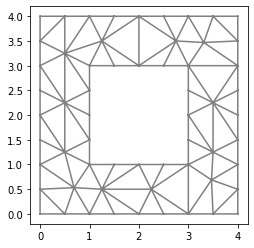

In [22]:
# Domain
domain = mshr.Rectangle(Point(0,0), Point(4,4))\
          - mshr.Rectangle(Point(1,1), Point(3,3))
mesh=generate_mesh(domain, 5)
plot(mesh)

In [23]:
import numpy as np
from dolfin import *
from mshr import *

import matplotlib.pyplot as plt

# Do not reorder degrees of freedom (dofs)
parameters['reorder_dofs_serial'] = False
# Extrapolate values to produce smoother representations
parameters['allow_extrapolation'] = True


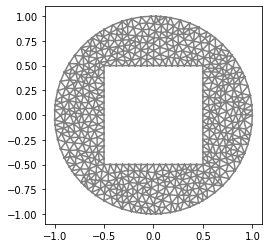

In [24]:
domain = Circle(Point(.0,.0), 1) - Rectangle(Point(-0.5,-0.5), Point(0.5,0.5))
domain_mesh = generate_mesh(domain, 20)
plot(domain_mesh)

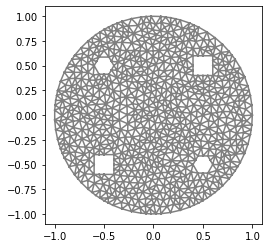

In [10]:
# Define the domain
domain = Circle(Point(0, 0), 1)

# Generate the mesh
domain_mesh = generate_mesh(domain, 20)

# Define the shapes to be placed inside the domain
shapes = [
    Circle(Point(-0.5, 0.5), 0.1),  # Circle 1
    Circle(Point(0.5, -0.5), 0.1),  # Circle 2
    Rectangle(Point(0.4,0.4), Point(0.6,0.6)),
    Rectangle(Point(-0.4,-0.4), Point(-0.6,-0.6))
]
# Create a boolean combination of the domain and the shapes
for shape in shapes:
    domain -= shape

# Generate the mesh with the shapes inside the domain
mesh = generate_mesh(domain, 20)
# Plot the mesh
plot(mesh)

In [25]:
# The basis functions are Lagrange polynomials of order 1 (i.e. linear functions)
function_space = FunctionSpace(domain_mesh, 'Lagrange', 1)
u = TrialFunction(function_space)
v = TestFunction(function_space)

In [26]:
def outer_boundary(x, on_boundary):
    x,y = x[0], x[1]
    return on_boundary and near(np.sqrt(x**2 + y**2), 1, 5e-2)
def top_boundary(x, on_boundary):
    return on_boundary and near(x[1], 0.5)
def bottom_boundary(x, on_boundary):
    return on_boundary and near(x[1], -0.5)
def left_boundary(x, on_boundary):
    return on_boundary and near(x[0], -0.5)
def right_boundary(x, on_boundary):
    return on_boundary and near(x[0], 0.5)

In [27]:
outer_bc = DirichletBC(function_space, Constant(0), outer_boundary)
top_bc = DirichletBC(function_space, Constant(1), top_boundary)
bottom_bc = DirichletBC(function_space, Constant(-1), bottom_boundary)
left_bc = DirichletBC(function_space, Constant(2), left_boundary)
right_bc = DirichletBC(function_space, Constant(-1), right_boundary)
boundaries = [outer_bc, top_bc, bottom_bc, left_bc, right_bc]

In [28]:
left_integrand = inner(nabla_grad(u), nabla_grad(v)) * dx
f =  Expression("x[0]*x[0]/2 + x[1]*x[1]", degree=1)
right_integrand = f*v*dx

In [37]:
solution = Function(function_space)
solve(left_integrand == right_integrand, solution, boundaries)

Solving linear variational problem.


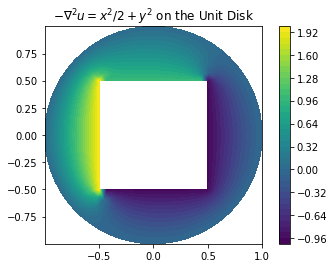

In [38]:
# Default visualization with the addition of a colorbar
p = plot(solution)
plt.title(r'$-∇ ^2 u = x^2/2+y^2$ on the Unit Disk')
plt.colorbar(p)
plt.show()

In [39]:
vtkfile_p = File('poisson_membrane/load.pvd')
vtkfile_p << solution

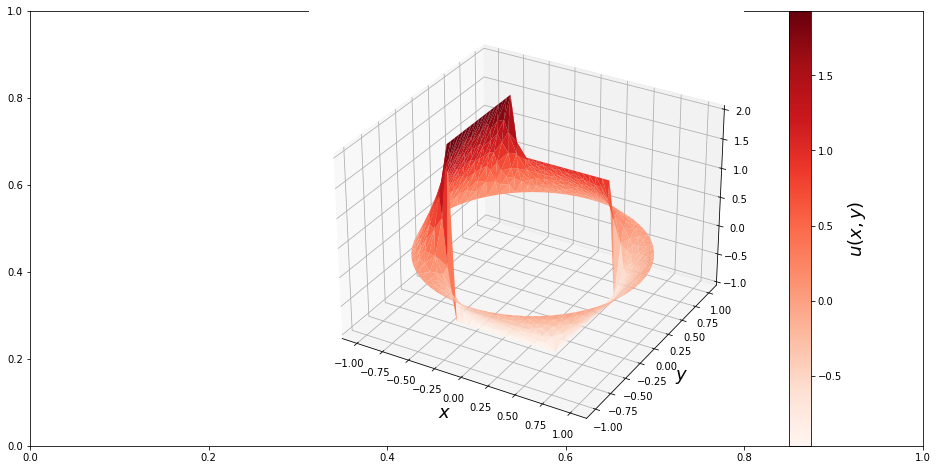

In [40]:
import matplotlib as mpl
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D
def mesh_triangulation(mesh):
    """
    Convert a FEniCS mesh into a matplotlib Triangulation
    """
    coordinates = mesh.coordinates()
    triangles = mesh.cells()
    return mpl.tri.Triangulation(coordinates[:, 0], coordinates[:, 1], triangles)
triangulation = mesh_triangulation(domain_mesh)
fig, ax = plt.subplots(1, 1, figsize=(16, 8))
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$y$", fontsize=18)
c = ax.plot_trisurf(triangulation, np.array(solution.vector()),cmap=mpl.cm.get_cmap("Reds"))
cb = plt.colorbar(c, ax=ax)
cb.set_label(r"$u(x, y)$", fontsize=18)

In [41]:
#set up linear algebra problem# Assemble the matrix A 
A = assemble(left_integrand)
# Assemble the vector b
b = assemble(right_integrand)
# Apply all boundary conditions 
[bc.apply(A,b) for bc in boundaries]
# create a placeholder for solution
solution = Function(function_space) 
# compute the solution
solve(A, solution.vector(), b)

Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.


1

Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Solving linear variational problem.


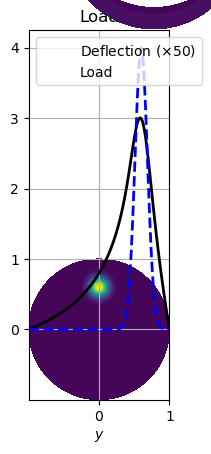

In [9]:
"""
FEniCS tutorial demo program: Deflection of a membrane.

  -Laplace(w) = p  in the unit circle
            w = 0  on the boundary

The load p is a Gaussian function centered at (0, 0.6).
"""

from __future__ import print_function
from fenics import *
from mshr import *
import numpy as np

# Create mesh and define function space
domain = Circle(Point(0, 0), 1)
mesh = generate_mesh(domain, 64)
V = FunctionSpace(mesh, 'P', 2)

# Define boundary condition
w_D = Constant(0)

def boundary(x, on_boundary):
    return on_boundary

bc = DirichletBC(V, w_D, boundary)

# Define load
beta = 8
R0 = 0.6
p = Expression('4*exp(-pow(beta, 2)*(pow(x[0], 2) + pow(x[1] - R0, 2)))',
               degree=1, beta=beta, R0=R0)

# Define variational problem
w = TrialFunction(V)
v = TestFunction(V)
a = dot(grad(w), grad(v))*dx
L = p*v*dx

# Compute solution
w = Function(V)
solve(a == L, w, bc)

# Plot solution
p = interpolate(p, V)
plot(w, title='Deflection')
plot(p, title='Load')

# Save solution to file in VTK format
vtkfile_w = File('poisson_membrane/deflection.pvd')
vtkfile_w << w
vtkfile_p = File('poisson_membrane/load.pvd')
vtkfile_p << p

# Curve plot along x = 0 comparing p and w
import numpy as np
import matplotlib.pyplot as plt
tol = 0.001  # avoid hitting points outside the domain
y = np.linspace(-1 + tol, 1 - tol, 101)
points = [(0, y_) for y_ in y]  # 2D points
w_line = np.array([w(point) for point in points])
p_line = np.array([p(point) for point in points])
plt.plot(y, 50*w_line, 'k', linewidth=2)  # magnify w
plt.plot(y, p_line, 'b--', linewidth=2)
plt.grid(True)
plt.xlabel('$y$')
plt.legend(['Deflection ($\\times 50$)', 'Load'], loc='upper left')
plt.savefig('poisson_membrane/curves.pdf')
plt.savefig('poisson_membrane/curves.png')

# Hold plots

plt.show()